In [1]:
from google.colab import files

uploaded = files.upload()

Saving attackdata.json to attackdata.json
Saving testdata.json to testdata.json
Saving testdata2.json to testdata2.json
Saving testdata3.json to testdata3.json
Saving testdata4.json to testdata4.json
Saving testdata5.json to testdata5.json
Saving testdata6.json to testdata6.json
Saving testdata7.json to testdata7.json
Saving testdata8.json to testdata8.json
Saving testdata9.json to testdata9.json
Saving testdata10.json to testdata10.json
Saving testdata11.json to testdata11.json
Saving testdata12.json to testdata12.json
Saving testdata13.json to testdata13.json
Saving testdata14.json to testdata14.json
Saving testdata15.json to testdata15.json
Saving testdata16.json to testdata16.json
Saving testdata17.json to testdata17.json
Saving testdata18.json to testdata18.json
Saving testdata19.json to testdata19.json
Saving testdata20.json to testdata20.json


In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import torch.nn.functional as F
from tokenizers import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=0221dd4b66b75268097f53189c5c82d1d33e0e5ee90d40113f9c964e075b162a
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


###Preprocessing and encoding

In [3]:
import json

# Assuming your JSON file is named "data.json"
with open('testdata.json', 'r') as f:
    data = json.load(f)

dataset=data

with open('testdata2.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata3.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata4.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata5.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata6.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata7.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata8.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata9.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata10.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata11.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata12.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata13.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata14.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata15.json', 'r') as f:
    data = json.load(f)

dataset+=data
# with open('testdata16.json', 'r') as f:
#     data = json.load(f)

# dataset+=data
with open('testdata17.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata18.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata19.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata20.json', 'r') as f:
    data = json.load(f)

dataset+=data

In [ ]:
print(dataset[0])

[{'BlockNumber': 15625410, 'TxHash': '0xc5f8f3448ff023c313c35579cc7ae704eef6be113a2edf0226e1171571d41cee', 'CallList': [{'to': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'from': '0x5354f00292296518713a47777bb6d2b9712fe74a', 'value': '0.0', 'gas': '0.000000000000168362', 'input': '0x69277b67'}, [[{'to': '0xdd6bd08c29ff3ef8780bf6a10d8b620a93ac5705', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000108744', 'input': '0x69277b67'}, [{'to': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000035571', 'input': '0x0c8496cc'}, [{'to': '0x52ae12abe5d8bd778bd5397f99ca900624cfadd4', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000000000002861', 'input': '0xbb34534c42616e636f72466f726d756c61'}, {'to': '0xb1cd6e4153b2a390cf00a6556b0fc1458c4a5533', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.00000

In [4]:
print(len(dataset))
print(dataset[0:10])

def hex_to_float32(hex_value):
    max_value=1e6
    # Remove '0x' prefix if present
    hex_value = hex_value.replace('0x', '')

    if not hex_value:
        hex_value = '0'

    # Convert hexadecimal to decimal
    decimal_value = int(hex_value, 16)

    # Scale down large values
    if decimal_value >= max_value:
        decimal_value = decimal_value%max_value

    # Convert decimal to float32
    float32_value = np.float32(decimal_value)

    return float32_value

def preprocess(dataset):
  flat_dataset = [item for sublist in dataset for item in sublist]


  def store_calls(data):
    calllist=[]
    for cur in data:
      cur['CallList'][1]=cur['CallList'][1][0]
      calllist.append(cur['CallList'])

    return calllist
  print(len(flat_dataset))
  calls=store_calls(flat_dataset)
  print(len(calls))
  def unnest(nested_list, level=0):
      encoded_list = []

      for item in nested_list:
          if isinstance(item, list):
              nested_encoded = unnest(item, level + 1)
              encoded_list.extend(nested_encoded)
          else:
              encoded_list.append(hex_to_float32(item["to"]))
              encoded_list.append(hex_to_float32(item["from"]))
              encoded_list.append(float(item["value"]))
              encoded_list.append(float(item["gas"]))
              encoded_list.append(hex_to_float32(item["input"]))
              encoded_list.append(float(level))

      return encoded_list



  unnested_calls=[]
    # Assuming each sublist in input_list is a sequence
  for seq in calls:
    unnested_calls.append(unnest(seq,0))
  return unnested_calls

unnested_calls=preprocess(dataset)

print(unnested_calls[0:10])

1834
[[{'BlockNumber': 17743455, 'TxHash': '0xfa1f35af097eace0960dc1d70188200c11cacd3b1f68a4ff915551020ec7ab90', 'CallList': [{'to': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'from': '0x49bcbc58848ac642b48f3d824d8b728a1045d08b', 'value': '0.0', 'gas': '0.000000000000735833', 'input': '0x06bb5402'}, [[{'to': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'from': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'value': '0.0', 'gas': '0.000000000000009815', 'input': '0x70a08231'}, [{'to': '0xa2327a938febf5fec13bacfb16ae10ecbc4cbdcf', 'from': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'value': '0.0', 'gas': '0.000000000000002529', 'input': '0x70a08231'}], {'to': '0xa88800cd213da5ae406ce248380802bd53b47647', 'from': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'value': '0.0', 'gas': '0.000000000000800262', 'input': '0x0965d04b'}, [{'to': '0x0000000000000000000000000000000000000004', 'from': '0xa88800cd213da5ae406ce248380802bd53b47647', 'value': '0.0', 'gas': '0.000000000000000015', 'in

In [ ]:
print(dataset[0])

[{'BlockNumber': 17743455, 'TxHash': '0xfa1f35af097eace0960dc1d70188200c11cacd3b1f68a4ff915551020ec7ab90', 'CallList': [{'to': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'from': '0x49bcbc58848ac642b48f3d824d8b728a1045d08b', 'value': '0.0', 'gas': '0.000000000000735833', 'input': '0x06bb5402'}, [{'to': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'from': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'value': '0.0', 'gas': '0.000000000000009815', 'input': '0x70a08231'}, [{'to': '0xa2327a938febf5fec13bacfb16ae10ecbc4cbdcf', 'from': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'value': '0.0', 'gas': '0.000000000000002529', 'input': '0x70a08231'}], {'to': '0xa88800cd213da5ae406ce248380802bd53b47647', 'from': '0xad3b67bca8935cb510c8d18bd45f0b94f54a968f', 'value': '0.0', 'gas': '0.000000000000800262', 'input': '0x0965d04b'}, [{'to': '0x0000000000000000000000000000000000000004', 'from': '0xa88800cd213da5ae406ce248380802bd53b47647', 'value': '0.0', 'gas': '0.000000000000000015', 'input': '

In [ ]:
import csv
csv_file_path = 'bad_contract.csv'

# Pad sequences to the maximum length in the dataset
max_sequence_length = max(len(seq) for seq in unnested_calls)
padded_data = [seq + [-1] * (max_sequence_length - len(seq)) for seq in unnested_calls]

# Write the list to a CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in padded_data:
        writer.writerow(row)

print(f'CSV file "{csv_file_path}" has been created successfully.')

CSV file "bad_contract.csv" has been created successfully.


In [5]:
import numpy as np
import pandas as pd

minimum=0.0
maximum=0.0

def min_max_normalize(data, min=0.0, max=0.0):
    global minimum
    global maximum
    # Create a copy of the data array
    normalized_data = data.copy()

    # Find indices of non-zero elements
    nonzero_indices = np.where(normalized_data != 0.0)

    # Find the minimum and maximum values in the data (ignoring 0.0)
    if min + max == 0.0:
      print("This is the first normalization")
      min_value = np.min(normalized_data[nonzero_indices])
      max_value = np.max(normalized_data[nonzero_indices])
      minimum = min_value
      maximum = max_value
    else:
      min_value=min
      max_value=max

    # Normalize the non-zero data to be between 0 and 1
    normalized_data[nonzero_indices] = (normalized_data[nonzero_indices] - min_value) / (max_value - min_value)

    return normalized_data

def encode(data, max_length=0):
    # Calculate the maximum length of any column
    if max_length == 0:
      max_length = max(len(col) for col in data)+100

    padded_data = []
    for seq in data:
        if len(seq) > max_length:
            padded_seq = seq[:max_length]  # Truncate if sequence is too long
        else:
            padded_seq = seq + [0.0] * (max_length - len(seq))  # Pad with zeros
        padded_data.append(padded_seq)

    # Convert to numpy array
    print("SIZE")
    print(len(padded_data))
    print(len(padded_data[0]))
    padded_array = np.array(padded_data, dtype=float)

    # # Normalize each column independently
    normalized_array = np.apply_along_axis(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else x, axis=0, arr=padded_array)

    if max_length == 0:
      normalized_array = min_max_normalize(padded_array)
    else:
      normalized_array = min_max_normalize(padded_array, minimum, maximum)

    return normalized_array, max_length

# Example usage
input_data, maxL = encode(unnested_calls)
print(input_data)
print(input_data.shape)
print(maximum)
print(minimum)



SIZE
1914
21868
This is the first normalization
[[0.63466703 0.9559388  0.         ... 0.         0.         0.        ]
 [0.98283418 0.2492946  0.         ... 0.         0.         0.        ]
 [0.98283418 0.14619562 0.         ... 0.         0.         0.        ]
 ...
 [0.10060154 0.64555326 0.         ... 0.         0.         0.        ]
 [0.79270943 0.64555326 0.         ... 0.         0.         0.        ]
 [0.67264075 0.2720276  0.         ... 0.         0.         0.        ]]
(1914, 21868)
999428.0
5e-18


In [ ]:
print(type(input_data))

<class 'numpy.ndarray'>


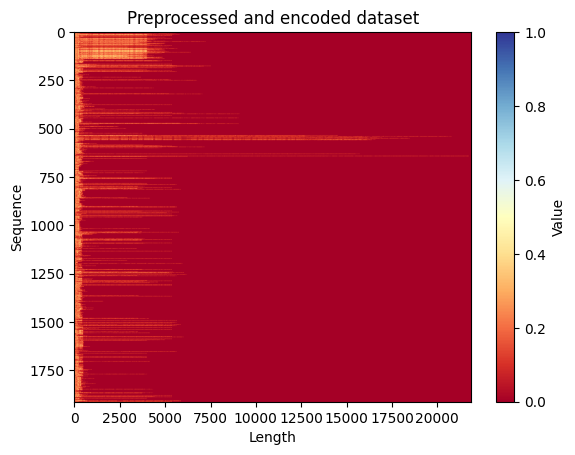

(1914, 21868)


In [6]:
def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Preprocessed and encoded dataset')
  plt.xlabel('Length')
  plt.ylabel('Sequence')
  plt.show()


plot_patterns(input_data)
print(input_data.shape)

prep_data=input_data


###DAGMM


Epoch 0/50,TRAIN Loss: -0.1875 - TEST Loss: -0.2153
Epoch 10/50,TRAIN Loss: -0.3815 - TEST Loss: -0.3810
Epoch 20/50,TRAIN Loss: -0.3824 - TEST Loss: -0.3820
Epoch 30/50,TRAIN Loss: -0.3824 - TEST Loss: -0.3821
Epoch 40/50,TRAIN Loss: -0.3824 - TEST Loss: -0.3821


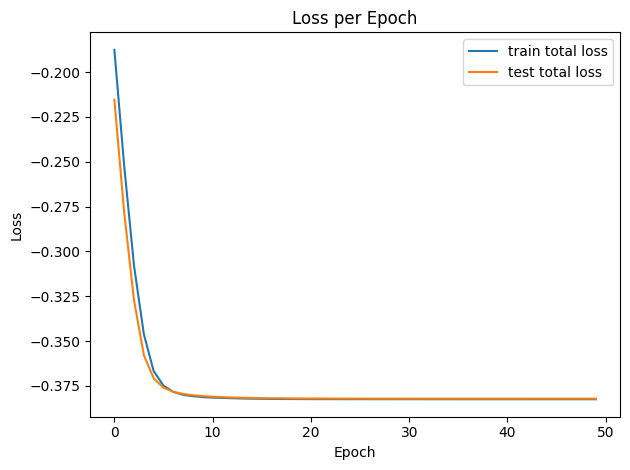

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from torch.autograd import Variable
import tensorflow as tf


# Define Deep Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, hidden_dim4),
            nn.Tanh(),
            nn.Linear(hidden_dim4, latent_dim-2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim-2, hidden_dim4),
            nn.Tanh(),
            nn.Linear(hidden_dim4, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, input_dim)

        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

# Define DAGMM Model
class DAGMM(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, latent_dim, n_gmm):
        super(DAGMM, self).__init__()
        self.autoencoder = Autoencoder(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, latent_dim)
        self.estimation_network = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim4),
            nn.Tanh(),
            nn.Dropout(p=0.5),
            nn.Linear(hidden_dim4, n_gmm),
            nn.Softmax(dim=1)
        )
        self.phi = torch.zeros(n_gmm)
        self.mu = torch.zeros(n_gmm,latent_dim)
        self.cov = torch.zeros(n_gmm, latent_dim, latent_dim)
        self.n_gmm=n_gmm
        self.latent_dim=latent_dim

    def relative_euclidean_distance(self, a, b):
        return (a-b).norm(2, dim=1) / a.norm(2, dim=1)

    def compute_cosine_similarity(self, x, x_hat):
        cosine_similarity = F.cosine_similarity(x, x_hat, dim=1)
        return cosine_similarity

    def cov_diag_loss(self):
        cov_inv = torch.zeros(self.cov.size(0), self.cov.size(1), self.cov.size(1), device=self.cov.device)
        det_cov = torch.zeros(self.cov.size(0), device=self.cov.device)
        cov_diag = 0
        for i in range(self.cov.size(0)):
            cov_k = self.cov[i].clone()
            cov_k += torch.diag(torch.full((self.cov.size(1),), 1e-1, device=self.cov.device))
            cov_inv[i] = torch.linalg.inv(cov_k)
            u, s, v = torch.svd(cov_k)
            det_cov[i] = s.prod() ** 2
            cov_diag += torch.sum(1 / cov_k.diag())

        return cov_diag, cov_inv, det_cov


    def forward(self, x):
        z, x_hat = self.autoencoder(x)
        rec_euclidean = self.relative_euclidean_distance(x, x_hat)
        cosine_similarity = self.compute_cosine_similarity(x,x_hat)
        z_with_errors = torch.cat([z, rec_euclidean.unsqueeze(-1), cosine_similarity.unsqueeze(-1)], dim=1)
        gamma = self.estimation_network(z_with_errors)
        return z, x_hat, z_with_errors, gamma


    def compute_energy(self, z):
        cov_diag, cov_inv, det_cov = self.cov_diag_loss()
        z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
        z_mu_cov_inv = torch.sum(z_mu.unsqueeze(-1) * cov_inv.unsqueeze(0), dim=-2)
        exp_term = torch.exp(-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1))
        positive_exp_term = (-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1)).clamp(min=0)
        max_positive_exp_term = torch.max(positive_exp_term, dim=1, keepdim=True)[0]
        energy = -max_positive_exp_term.squeeze() - torch.log(
            torch.sum(self.phi.unsqueeze(0) * exp_term / (torch.sqrt(det_cov)).unsqueeze(0), dim=1) + 1e-12
        )
        return energy



    def loss_function(self, x, lambda_energy, lambda_cov_diag):
        _, x_hat, z, gamma, = self(x)
        N = gamma.size(0)
        sum_gamma = torch.sum(gamma, dim=0)
        if model.training:
          self.phi = (sum_gamma / N)
          self.mu = torch.sum(gamma.unsqueeze(-1) * z.unsqueeze(1), dim=0) / sum_gamma.unsqueeze(-1)
          z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
          z_mu_outer = z_mu.unsqueeze(-1) * z_mu.unsqueeze(-2)
          self.cov = torch.sum(gamma.unsqueeze(-1).unsqueeze(-1) * z_mu_outer, dim = 0) / sum_gamma.unsqueeze(-1).unsqueeze(-1)
        sample_energy = self.compute_energy(z)
        loss = torch.mean((x - x_hat) ** 2) + lambda_energy * torch.mean(sample_energy) + lambda_cov_diag * self.cov_diag_loss()[0]
        return loss

    def get_energy(self, x,  torch_type=True):
        enc, dec, z, gamma = self(x)
        energy = self.compute_energy(z)
        ret_energy=energy.data.numpy()

        if torch_type == True:
          ret_energy=torch.from_numpy(ret_energy)

        return ret_energy


# Hyperparameters
input_dim = len(prep_data[0])
hidden_dim1 = 1000
hidden_dim2 = 400
hidden_dim3 = 150
hidden_dim4 = 50
latent_dim = 3
n_gmm = 2
lr = 1e-4
epochs = 50
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 1200

# Create model and optimizer
model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, latent_dim, n_gmm)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Training function
def train(model, train_loader, test_loader, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        epoch_loss_test = 0.0
        running_loss = 0.0
        test_running_loss=0.0
        count=0
        count_test=0
        for batch_idx, data in enumerate(train_loader):
            optimizer.zero_grad()
            total_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
            model.zero_grad()
            total_loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
            optimizer.step()
            running_loss += total_loss.item()

            loss = []
            loss.append( total_loss.item())
            count+=1
        epoch_loss=running_loss/count
        train_losses.append(epoch_loss)

        model.eval()
        with torch.no_grad():
            for batch_idx, data in enumerate(test_loader):
                test_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
                loss = []
                loss.append( test_loss.item())
                test_running_loss += test_loss.item()
                count_test+=1
        epoch_loss_test=test_running_loss/count_test
        test_losses.append(epoch_loss_test)
        if epoch%10 == 0:
          print(f"Epoch {epoch}/{num_epochs},TRAIN Loss: {epoch_loss:.4f} - TEST Loss: {epoch_loss_test:.4f}")
    return train_losses, test_losses


# Plotting function
def plot_losses(loss_data):
    plt.plot(loss_data[0], label="train total loss")
    plt.plot(loss_data[1], label="test total loss")
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
    plt.show()



# Train the model
losses = train(model, train_loader, test_loader, optimizer, epochs)

# Test the model
# test_losses = test(model, test_loader)

# avg_test_energy = sum(test_energy) / len(test_energy)

# Plot losses
plot_losses(losses)  # Broadcasting test loss to match training loss length
# print("Average Test Energy: ", avg_test_energy)
# plot_losses(test_losses)

threshold -6.896240739822388
Detected 10 anomalies in test.
Detected 10 anomalies in train.


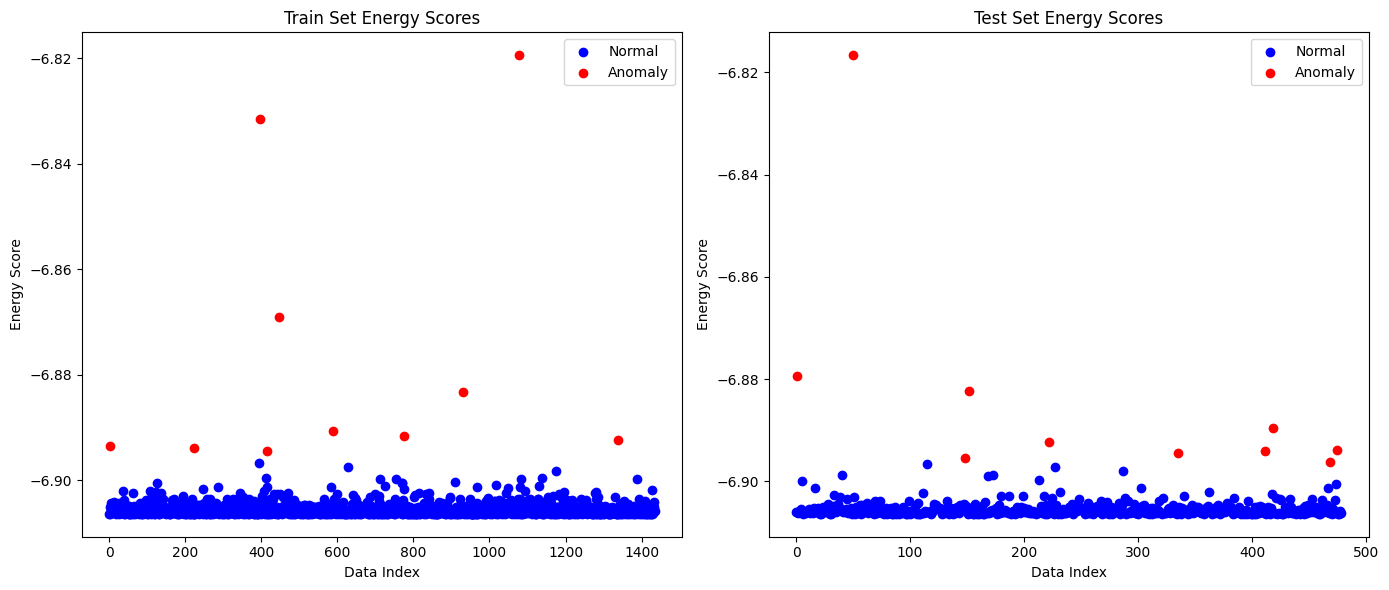

In [ ]:
import matplotlib.pyplot as plt

# Compute energy scores for train and test data
train_energy = model.get_energy(train_data)
test_energy = model.get_energy(test_data)

all_energy=np.concatenate((train_energy, test_energy), axis=0)

threshold = np.percentile(all_energy, 99)
print(f"threshold {threshold}")

anomaly_indices_test=torch.where(test_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_test)} anomalies in test.")

anomaly_indices_train=torch.where(train_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_train)} anomalies in train.")

# Create plots
plt.figure(figsize=(14, 6))

# Train set plot
plt.subplot(1, 2, 1)
normal_train_indices = torch.where(train_energy < threshold)[0]
anomaly_train_indices = torch.where(train_energy >= threshold)[0]
plt.scatter(normal_train_indices, train_energy[normal_train_indices], c='blue', label='Normal')
plt.scatter(anomaly_train_indices, train_energy[anomaly_train_indices], c='red', label='Anomaly')
plt.title('Train Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
normal_test_indices = torch.where(test_energy < threshold)[0]
anomaly_test_indices = torch.where(test_energy >= threshold)[0]
plt.scatter(normal_test_indices, test_energy[normal_test_indices], c='blue', label='Normal')
plt.scatter(anomaly_test_indices, test_energy[anomaly_test_indices], c='red', label='Anomaly')
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
# Find the index of the maximum energy score
max_energy_index = torch.argmax(train_energy)
print(train_energy[torch.argmax(train_energy)])

print("Index of the maximum energy score:", max_energy_index.item())
matching=train_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

max_energy_index = torch.argmax(test_energy)
print(test_energy[max_energy_index])

print("Index of the maximum energy score:", max_energy_index.item())
matching=test_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

tensor(-6.8194)
Index of the maximum energy score: 1078
Index of matching node: 433
in dataset:  {'BlockNumber': 17730870, 'TxHash': '0x871ad4839aa9b285e1043d191c6821ed1e4c42257dd94b422835177cfd3a38c4', 'CallList': [{'to': '0x4dece678ceceb27446b35c672dc7d61f30bad69e', 'from': '0x5919b3d42bd84e816533c2dd6a7dff7d02303e87', 'value': '0.0', 'gas': '0.000000000000048897', 'input': '0x095ea7b3'}, [{'to': '0x67fe41a94e779ccfa22cff02cc2957dc9c0e4286', 'from': '0x4dece678ceceb27446b35c672dc7d61f30bad69e', 'value': '0.0', 'gas': '0.000000000000024275', 'input': '0x095ea7b3'}]]}
tensor(-6.8166)
Index of the maximum energy score: 50
Index of matching node: 1162
in dataset:  {'BlockNumber': 17706557, 'TxHash': '0xdbfbb1ac88c5d56a4817d1d6d5c9485174944b03ef4bcf7bb186bd917fe48a67', 'CallList': [{'to': '0x4dece678ceceb27446b35c672dc7d61f30bad69e', 'from': '0x3c5faaf770511e403fd907e6d77ac8f5bc699cbe', 'value': '0.0', 'gas': '0.000000000000048633', 'input': '0x095ea7b3'}, [{'to': '0x67fe41a94e779ccfa22cf

12
12
528
48492
SIZE
12
21868


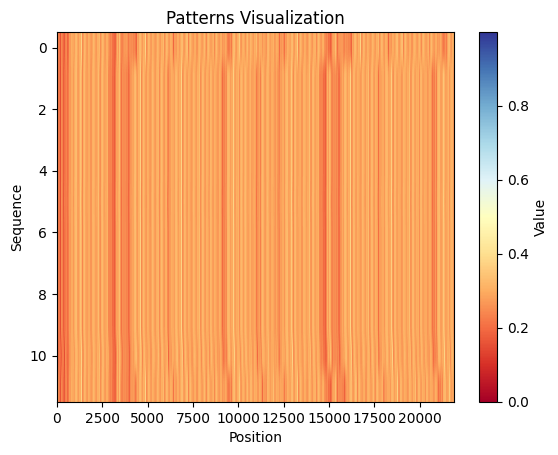

(12, 21868)
eval 1:  tensor([-6.9018, -6.8997, -6.8997, -6.8997, -6.8997, -6.8998, -6.8997, -6.8997,
        -6.8997, -6.8997, -6.8982, -6.9015])


In [ ]:
with open('attackdata.json', 'r') as f:
    data = json.load(f)

anomally_dataset=data

anom1 = preprocess(anomally_dataset)

print(len(unnested_calls[0]))
print(len(anom1[0]))
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)

def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Patterns Visualization')
  plt.xlabel('Position')
  plt.ylabel('Sequence')
  plt.gca().yaxis.get_major_locator().set_params(integer=True)
  plt.show()


plot_patterns(anom_fin)
print(anom_fin.shape)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res1=model.get_energy(anom)


print("eval 1: ", res1)


<class 'torch.Tensor'>
tensor([-6.9018, -6.8997, -6.8997, -6.8997, -6.8997, -6.8998, -6.8997, -6.8997,
        -6.8997, -6.8997, -6.8982, -6.9015])
try again


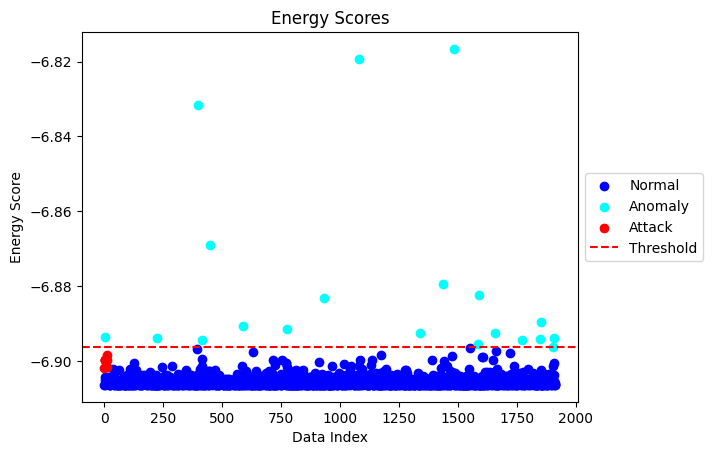

In [ ]:
print(type(test_energy))

normal_energy=torch.cat((train_energy, test_energy), dim=0)

normal_indices = torch.where(normal_energy < threshold)[0]
anomaly_indices = torch.where(normal_energy >= threshold)[0]
attack = res1.detach()


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)
plt.scatter(range(len(attack)), attack, c='red', label='Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if(attack[0]>threshold):
  print("Found you")
else:
  print("try again")


89
89
SIZE
89
21868


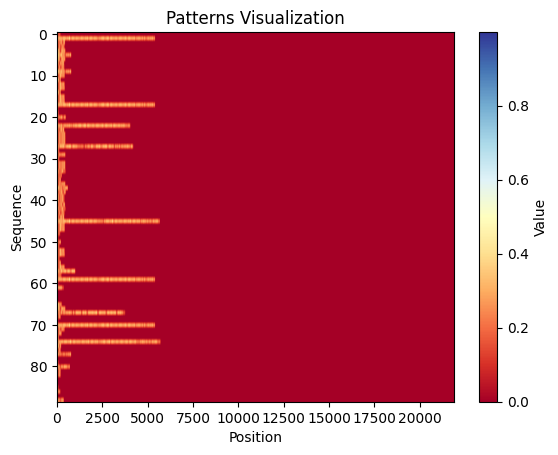

In [ ]:
with open('testdata16.json', 'r') as f:
    data = json.load(f)

example_dataset=data

# with open('attackdata.json', 'r') as f:
#     data = json.load(f)

# example_dataset+=[data]


exam1 = preprocess(example_dataset)

exam_fin, _=encode(exam1, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)



plot_patterns(exam_fin)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res2=model.get_energy(exam)



[]

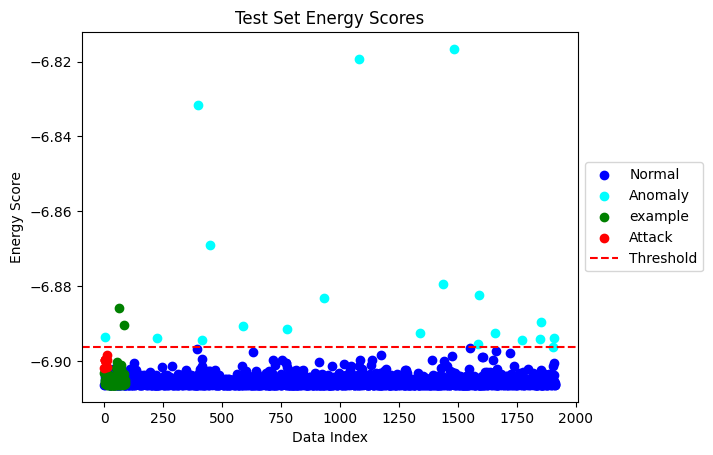

In [ ]:
example = res2.detach()

plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
plt.scatter(range(len(example)), example, c='green', label='example')

plt.scatter(range(len(attack)), attack, c='red', label='Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.plot()


In [ ]:
max_energy_index = torch.argmax(example)
print("Index of the maximum energy score:", max_energy_index.item())
matching=example[max_energy_index].item()
matching_index = None
# for i, node in enumerate(torch.tensor(exam_fin, dtype=torch.float)):
#     if np.array_equal(node, matching):
#         matching_index = i
#         break

flat_dataset = [item for sublist in example_dataset for item in sublist]
print("Energy found:", matching)
if matching != None:
  print("in dataset: ", flat_dataset[max_energy_index])

Index of the maximum energy score: 62
Energy found: -6.885917663574219
in dataset:  {'BlockNumber': 17696707, 'TxHash': '0x027bee5998ff4d8c73c21195e901889dd469f239fece9a1dc2b12832c6956390', 'CallList': [{'to': '0x4dece678ceceb27446b35c672dc7d61f30bad69e', 'from': '0xbe81ad8fd494a11ecd2fe25f2d52d731a8cbd7ee', 'value': '0.0', 'gas': '0.000000000000048621', 'input': '0x095ea7b3'}, [{'to': '0x67fe41a94e779ccfa22cff02cc2957dc9c0e4286', 'from': '0x4dece678ceceb27446b35c672dc7d61f30bad69e', 'value': '0.0', 'gas': '0.000000000000024275', 'input': '0x095ea7b3'}]]}


In [ ]:
found=[]
threshold_value=[]
attack_energy=[]
example_above_thres=[]
train_above_attack=[]
test_above_attack=[]
example_above_attack=[]

In [ ]:
def print_metrics(threshold, train_energy, test_energy, attack, example):

  print("the attack is found by the model: ", (attack[0] >= threshold).item())
  print("The threshold is: ", threshold)
  print("The energy value of the attack is: ", attack[0].item())
  print("the highest energy in train is: ", train_energy[torch.argmax(train_energy)])
  print("the highest energy in test is: ", test_energy[torch.argmax(test_energy)])
  print("the highest energy in example is: ", example[torch.argmax(example)])
  found.append((attack[0] >= threshold).item())
  threshold_value.append(threshold)
  attack_energy.append(attack[0].item())

  print("------------------")

  print("number of transactions with energy greater or equal to the threshold in train is: ", len(torch.where(train_energy >= threshold)[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the threshold in test is: ", len(torch.where(test_energy >= threshold)[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the threshold in example is: ", len(torch.where(example >= threshold)[0]), " out of: ", len(example))
  example_above_thres.append(len(torch.where(example >= threshold)[0]))
  print("------------------")

  print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(train_energy >= attack[0])[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(test_energy >= attack[0])[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example >= attack[0])[0]), " out of: ", len(example))
  train_above_attack.append(len(torch.where(train_energy >= attack[0])[0]))
  test_above_attack.append(len(torch.where(test_energy >= attack[0])[0]))
  example_above_attack.append(len(torch.where(example >= attack[0])[0]))
  print("------------------")

  print("average energy value in train is: ",torch.mean(train_energy))
  print("average energy value in test is: ",torch.mean(test_energy))
  print("average energy value in example is: ",torch.mean(example))

print_metrics(threshold, train_energy, test_energy, attack, example)

the attack is found by the model:  False
The threshold is:  -6.898073568344116
The energy value of the attack is:  -6.902299404144287
the highest energy in train is:  tensor(-6.8313)
the highest energy in test is:  tensor(-6.8288)
the highest energy in example is:  tensor(-6.8892)
------------------
number of transactions with energy greater or equal to the threshold in train is:  10  out of:  1435
number of transactions with energy greater or equal to the threshold in test is:  10  out of:  479
number of transactions with energy greater or equal to the threshold in example is:  2  out of:  89
------------------
number of transactions with energy greater or equal to the attack in train is:  31  out of:  1435
number of transactions with energy greater or equal to the attack in test is:  24  out of:  479
number of transactions with energy greater or equal to the attack in example is:  6  out of:  89
------------------
average energy value in train is:  tensor(-6.9056)
average energy valu

In [ ]:
def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

print(len(found))
print("av found : ", mean(found))
print("av threshold_value : ", mean(threshold_value))
print("av attack_energy : ", mean(attack_energy))
print("av example_above_thres : ", mean(example_above_thres))
print("av train_above_attack : ", mean(train_above_attack))
print("av test_above_attack : ", mean(test_above_attack))
print("av example_above_attack : ", mean(example_above_attack))

1
av found :  0.0
av threshold_value :  -6.898073568344116
av attack_energy :  -6.902299404144287
av example_above_thres :  2.0
av train_above_attack :  31.0
av test_above_attack :  24.0
av example_above_attack :  6.0


###True-False

In i=  0
Epoch 0/50,TRAIN Loss: -0.1837 - TEST Loss: -0.2219
Epoch 10/50,TRAIN Loss: -0.3816 - TEST Loss: -0.3824
Epoch 20/50,TRAIN Loss: -0.3828 - TEST Loss: -0.3833
Epoch 30/50,TRAIN Loss: -0.3828 - TEST Loss: -0.3834
Epoch 40/50,TRAIN Loss: -0.3829 - TEST Loss: -0.3834


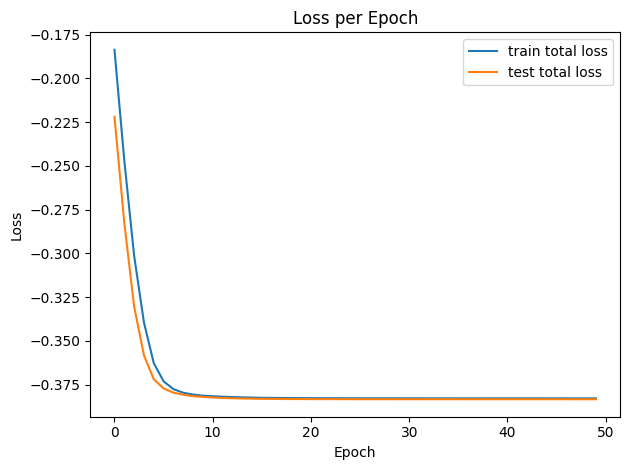

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.8333333333333334
True negative:  1.0
False possitive:  0.0
False negative:  0.16666666666666666
True possitive:  1.0
True negative:  0.9012345679012346
False possitive:  0.09876543209876543
False negative:  0.0
True possitive:  1.0
True negative:  0.8271604938271605
False possitive:  0.1728395061728395
False negative:  0.0
True possitive:  1.0
True negative:  0.7530864197530864
False possitive:  0.24691358024691357
False negative:  0.0
True possitive:  1.0
True negative:  0.5185185185185185
False possitive:  0.48148148148148145
False negative:  0.0
In i=  1
Epoch 0/50,TRAIN Loss: -0.1862 - TEST Loss: -0.2113
Epoch 10/50,TRAIN Loss: -0.3814 - TEST Loss: -0.3825
Epoch 20/50,TRAIN Loss: -0.3824 - TEST Loss: -0.3834
Epoch 30/50,TRAIN Loss: -0.3825 - TEST Loss: -0.383

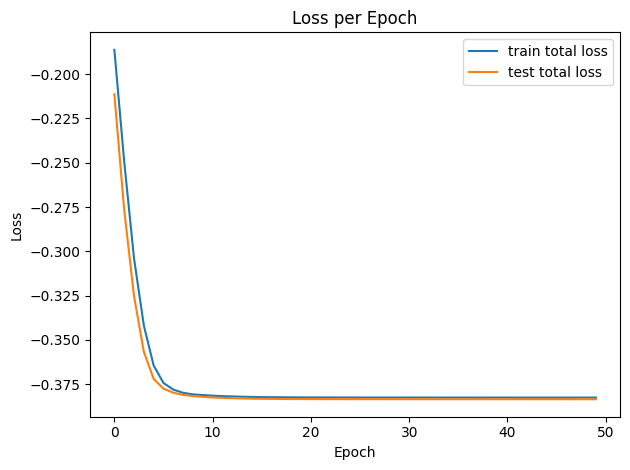

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  1.0
True negative:  0.9135802469135802
False possitive:  0.08641975308641975
False negative:  0.0
True possitive:  1.0
True negative:  0.9012345679012346
False possitive:  0.09876543209876543
False negative:  0.0
True possitive:  1.0
True negative:  0.8271604938271605
False possitive:  0.1728395061728395
False negative:  0.0
True possitive:  1.0
True negative:  0.7654320987654321
False possitive:  0.2345679012345679
False negative:  0.0
True possitive:  1.0
True negative:  0.5679012345679012
False possitive:  0.43209876543209874
False negative:  0.0
In i=  2
Epoch 0/50,TRAIN Loss: -0.1404 - TEST Loss: -0.1872
Epoch 10/50,TRAIN Loss: -0.3818 - TEST Loss: -0.3815
Epoch 20/50,TRAIN Loss: -0.3830 - TEST Loss: -0.3825
Epoch 30/50,TRAIN Loss: -0.3831 - TEST Loss: -0.3826

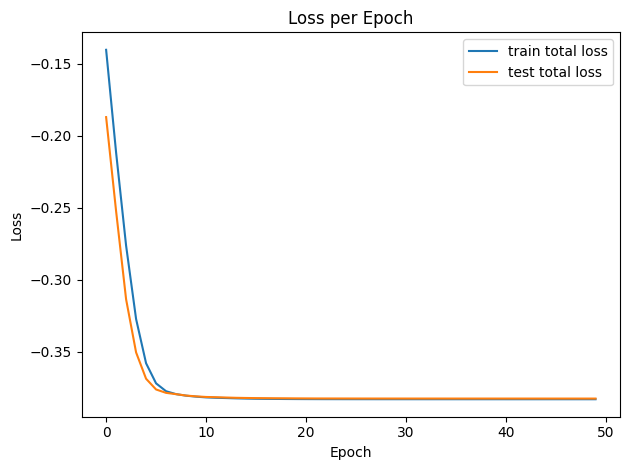

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.08333333333333333
True negative:  1.0
False possitive:  0.0
False negative:  0.9166666666666666
True possitive:  0.8333333333333334
True negative:  1.0
False possitive:  0.0
False negative:  0.16666666666666666
True possitive:  1.0
True negative:  0.8641975308641975
False possitive:  0.13580246913580246
False negative:  0.0
True possitive:  1.0
True negative:  0.7283950617283951
False possitive:  0.2716049382716049
False negative:  0.0
True possitive:  1.0
True negative:  0.5679012345679012
False possitive:  0.43209876543209874
False negative:  0.0
In i=  3
Epoch 0/50,TRAIN Loss: -0.1645 - TEST Loss: -0.1936
Epoch 10/50,TRAIN Loss: -0.3820 - TEST Loss: -0.3820
Epoch 20/50,TRAIN Loss: -0.3830 - TEST Loss: -0.3830
Epoch 30/50,TRAIN Loss: -0.3830 - TEST Loss: -0.383

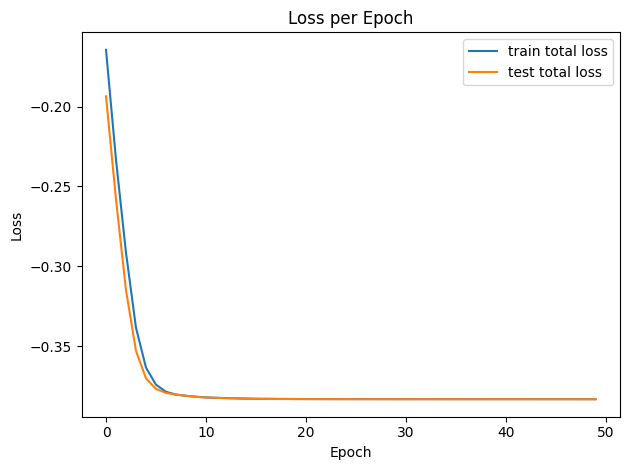

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  1.0
True negative:  0.9135802469135802
False possitive:  0.08641975308641975
False negative:  0.0
True possitive:  1.0
True negative:  0.9135802469135802
False possitive:  0.08641975308641975
False negative:  0.0
True possitive:  1.0
True negative:  0.8148148148148148
False possitive:  0.18518518518518517
False negative:  0.0
True possitive:  1.0
True negative:  0.7160493827160493
False possitive:  0.2839506172839506
False negative:  0.0
True possitive:  1.0
True negative:  0.5679012345679012
False possitive:  0.43209876543209874
False negative:  0.0
In i=  4
Epoch 0/50,TRAIN Loss: -0.1431 - TEST Loss: -0.1651
Epoch 10/50,TRAIN Loss: -0.3814 - TEST Loss: -0.3832
Epoch 20/50,TRAIN Loss: -0.3825 - TEST Loss: -0.3840
Epoch 30/50,TRAIN Loss: -0.3825 - TEST Loss: -0.384

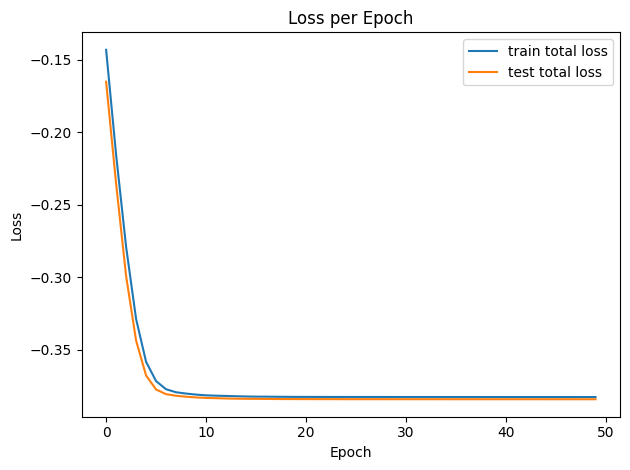

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  1.0
True negative:  0.9876543209876543
False possitive:  0.012345679012345678
False negative:  0.0
True possitive:  1.0
True negative:  0.9382716049382716
False possitive:  0.06172839506172839
False negative:  0.0
True possitive:  1.0
True negative:  0.8641975308641975
False possitive:  0.13580246913580246
False negative:  0.0
True possitive:  1.0
True negative:  0.7407407407407407
False possitive:  0.25925925925925924
False negative:  0.0
True possitive:  1.0
True negative:  0.5555555555555556
False possitive:  0.4444444444444444
False negative:  0.0
In i=  5
Epoch 0/50,TRAIN Loss: -0.1860 - TEST Loss: -0.2133
Epoch 10/50,TRAIN Loss: -0.3815 - TEST Loss: -0.3827
Epoch 20/50,TRAIN Loss: -0.3824 - TEST Loss: -0.3837
Epoch 30/50,TRAIN Loss: -0.3825 - TEST Loss: -0.38

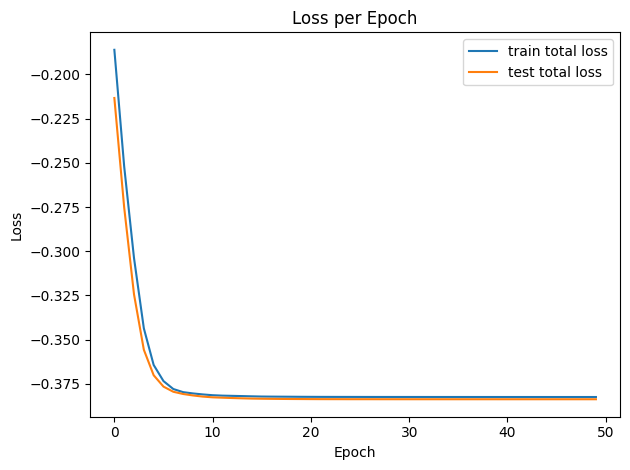

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.08333333333333333
True negative:  1.0
False possitive:  0.0
False negative:  0.9166666666666666
True possitive:  0.9166666666666666
True negative:  0.9753086419753086
False possitive:  0.024691358024691357
False negative:  0.08333333333333333
True possitive:  1.0
True negative:  0.8271604938271605
False possitive:  0.1728395061728395
False negative:  0.0
True possitive:  1.0
True negative:  0.7407407407407407
False possitive:  0.25925925925925924
False negative:  0.0
True possitive:  1.0
True negative:  0.5925925925925926
False possitive:  0.4074074074074074
False negative:  0.0
In i=  6
Epoch 0/50,TRAIN Loss: -0.1674 - TEST Loss: -0.2037
Epoch 10/50,TRAIN Loss: -0.3824 - TEST Loss: -0.3814
Epoch 20/50,TRAIN Loss: -0.3834 - TEST Loss: -0.3827
Epoch 30/50,TRAIN Lo

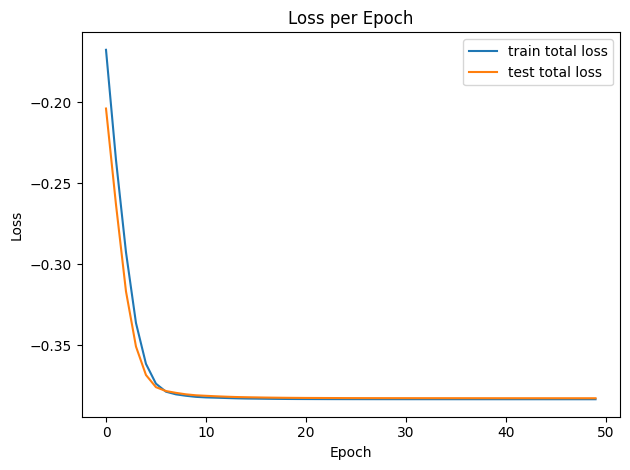

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.8333333333333334
True negative:  0.9876543209876543
False possitive:  0.012345679012345678
False negative:  0.16666666666666666
True possitive:  1.0
True negative:  0.9135802469135802
False possitive:  0.08641975308641975
False negative:  0.0
True possitive:  1.0
True negative:  0.8271604938271605
False possitive:  0.1728395061728395
False negative:  0.0
True possitive:  1.0
True negative:  0.7901234567901234
False possitive:  0.20987654320987653
False negative:  0.0
True possitive:  1.0
True negative:  0.6666666666666666
False possitive:  0.3333333333333333
False negative:  0.0
In i=  7
Epoch 0/50,TRAIN Loss: -0.2264 - TEST Loss: -0.2097
Epoch 10/50,TRAIN Loss: -0.3826 - TEST Loss: -0.3813
Epoch 20/50,TRAIN Loss: -0.3835 - TEST Loss: -0.3827
Epoch 30/50,TRAIN Lo

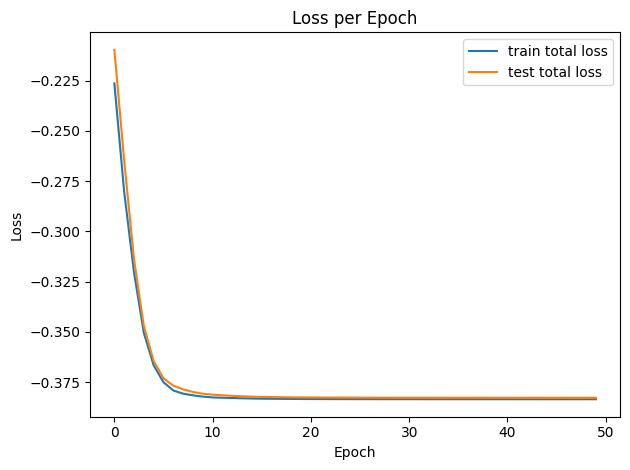

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.75
True negative:  1.0
False possitive:  0.0
False negative:  0.25
True possitive:  1.0
True negative:  0.9629629629629629
False possitive:  0.037037037037037035
False negative:  0.0
True possitive:  1.0
True negative:  0.8271604938271605
False possitive:  0.1728395061728395
False negative:  0.0
True possitive:  1.0
True negative:  0.7901234567901234
False possitive:  0.20987654320987653
False negative:  0.0
True possitive:  1.0
True negative:  0.6419753086419753
False possitive:  0.35802469135802467
False negative:  0.0
In i=  8
Epoch 0/50,TRAIN Loss: -0.1610 - TEST Loss: -0.1958
Epoch 10/50,TRAIN Loss: -0.3819 - TEST Loss: -0.3812
Epoch 20/50,TRAIN Loss: -0.3830 - TEST Loss: -0.3823
Epoch 30/50,TRAIN Loss: -0.3831 - TEST Loss: -0.3823
Epoch 40/50,TRAIN Loss: -0

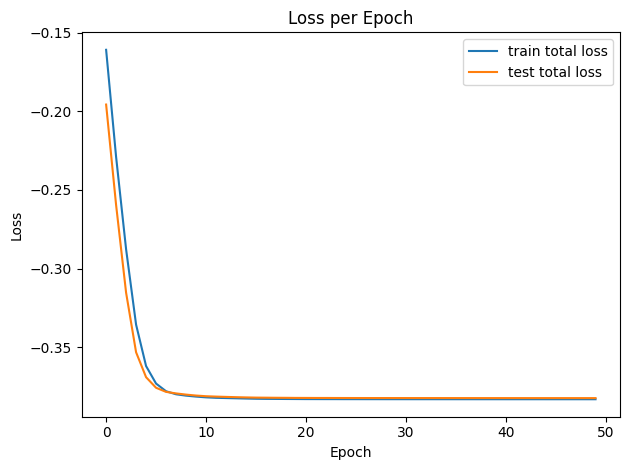

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.8333333333333334
True negative:  1.0
False possitive:  0.0
False negative:  0.16666666666666666
True possitive:  1.0
True negative:  0.9135802469135802
False possitive:  0.08641975308641975
False negative:  0.0
True possitive:  1.0
True negative:  0.7901234567901234
False possitive:  0.20987654320987653
False negative:  0.0
True possitive:  1.0
True negative:  0.7037037037037037
False possitive:  0.2962962962962963
False negative:  0.0
True possitive:  1.0
True negative:  0.5679012345679012
False possitive:  0.43209876543209874
False negative:  0.0
In i=  9
Epoch 0/50,TRAIN Loss: -0.1564 - TEST Loss: -0.1945
Epoch 10/50,TRAIN Loss: -0.3812 - TEST Loss: -0.3834
Epoch 20/50,TRAIN Loss: -0.3823 - TEST Loss: -0.3842
Epoch 30/50,TRAIN Loss: -0.3823 - TEST Loss: -0.384

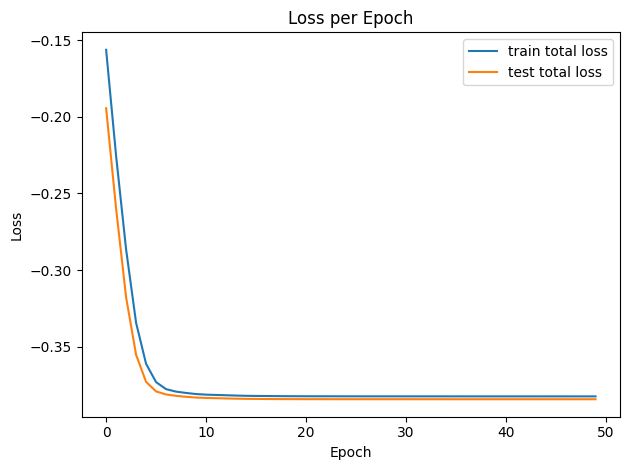

81
81
SIZE
81
21868
12
12
SIZE
12
21868
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  0.0
True negative:  1.0
False possitive:  0.0
False negative:  1.0
True possitive:  1.0
True negative:  0.9382716049382716
False possitive:  0.06172839506172839
False negative:  0.0
True possitive:  1.0
True negative:  0.9135802469135802
False possitive:  0.08641975308641975
False negative:  0.0
True possitive:  1.0
True negative:  0.8024691358024691
False possitive:  0.19753086419753085
False negative:  0.0
True possitive:  1.0
True negative:  0.7283950617283951
False possitive:  0.2716049382716049
False negative:  0.0
True possitive:  1.0
True negative:  0.5555555555555556
False possitive:  0.4444444444444444
False negative:  0.0

Results after 10 model trains
_____________________________
For threshold =  0.01
False possitive:  0.0
True possitive:  0.0
False negative:  1.0
True negative:  1.0
For threshold =  0.1
False possitive:  0.0
True poss

In [ ]:
input_dim = len(prep_data[0])
hidden_dim1 = 1000
hidden_dim2 = 400
hidden_dim3 = 150
hidden_dim4 = 50
latent_dim = 3
n_gmm = 2
lr = 1e-4
epochs = 50
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 1200

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

def stats(example, attack, threshold):
  res=[]
  for thres in threshold:
    false_pos=len(torch.where(example >= thres)[0])/len(example)
    true_pos=len(torch.where(attack >= thres)[0])/len(attack)
    false_neg=len(torch.where(attack < thres)[0])/len(attack)
    true_neg=len(torch.where(example < thres)[0])/len(example)
    res.append([true_pos, true_neg, false_pos, false_neg])

  return res



def train_model(model, prep_data, optimizer, epochs):
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


  losses = train(model, train_loader, test_loader, optimizer, epochs)
  plot_losses(losses)
  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():
    train_energy = model.get_energy(train_data)
    test_energy = model.get_energy(test_data)

    all_energy=np.concatenate((train_energy, test_energy), axis=0)

    threshold = [np.percentile(all_energy, 99.99),np.percentile(all_energy, 99.9),np.percentile(all_energy, 99.5),np.percentile(all_energy, 99),np.percentile(all_energy, 95),np.percentile(all_energy, 90),np.percentile(all_energy, 75)]

    with open('testdata6.json', 'r') as f:
      data = json.load(f)

    example_dataset=data
    exam1 = preprocess(example_dataset)
    exam_fin, _=encode(exam1, maxL)
    exam = torch.tensor(exam_fin, dtype=torch.float)
    res2=model.get_energy(exam)
    example = res2.detach()
    with open('attackdata.json', 'r') as f:
      data = json.load(f)
    anomally_dataset=data
    anom1 = preprocess(anomally_dataset)
    anom_fin,_=encode(anom1, maxL)
    anom = torch.tensor(anom_fin, dtype=torch.float)
    res1=model.get_energy(anom)
    attack = res1.detach()

    ftpn=stats(example, attack, threshold)
    return ftpn
i=0
while(i<10):
  print("In i= ", i)
  model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, latent_dim, n_gmm)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  results = train_model(model, prep_data, optimizer, epochs)
  count=0
  for res in results:
    print("True possitive: ", res[0])
    print("True negative: ", res[1])
    print("False possitive: ", res[2])
    print("False negative: ", res[3])
    true_pos_arr[count].append(res[0])
    true_neg_arr[count].append(res[1])
    false_pos_arr[count].append(res[2])
    false_neg_arr[count].append(res[3])
    count+=1
  i+=1
thresholds=[0.01, 0.1, 0.5, 1, 5, 10, 25]
print()
print("Results after 10 model trains")
print("_____________________________")
count=0
for tr in thresholds:
  print("For threshold = ", tr)
  print("False possitive: ", mean(true_pos_arr[count]))
  print("True possitive: ", mean(false_pos_arr[count]))
  print("False negative: ", mean(true_neg_arr[count]))
  print("True negative: ", mean(false_neg_arr[count]))
  count+=1




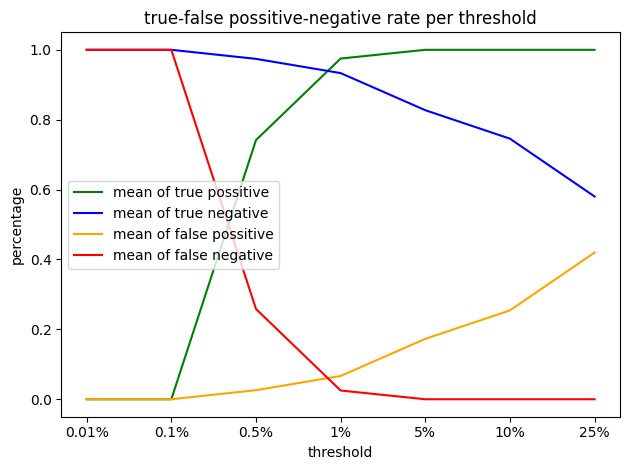

In [ ]:
  import matplotlib.pyplot as plt
  mtp=[]
  mfp=[]
  mtn=[]
  mfn=[]
  tpos=[0.0, 0.0, 0.7416666666666666, 0.975, 1.0, 1.0, 1.0]
  tneg=[1.0, 1.0, 0.9740740740740741, 0.9333333333333333, 0.8271604938271604, 0.745679012345679, 0.5802469135802469]
  fpos=[0.0, 0.0, 0.025925925925925925, 0.06666666666666665, 0.17283950617283952, 0.254320987654321, 0.41975308641975306]
  fneg=[1.0, 1.0, 0.2583333333333333, 0.025, 0.0, 0.0, 0.0]
  t=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
  count=0
  # for tr in thresholds:
  #   mtp.append(mean(true_pos_arr[count])*100)
  #   mtn.append(mean(true_neg_arr[count])*100)
  #   mfp.append(mean(false_pos_arr[count])*100)
  #   mfn.append(mean(false_neg_arr[count])*100)
  #   count+=1
thresholds=[0.01, 0.1, 0.5, 1, 5, 10, 25]
for tr in thresholds:
    mtp.append(tpos[count])
    mtn.append(tneg[count])
    mfp.append(fpos[count])
    mfn.append(fneg[count])
    count+=1


  plt.plot(t, mtp, label="mean of true possitive", c='green')
  plt.plot(t, mtn, label="mean of true negative", c='blue')
  plt.plot(t, mfp, label="mean of false possitive", c='orange')
  plt.plot(t, mfn, label="mean of false negative", c='red')
  plt.title('true-false possitive-negative rate per threshold')
  plt.xlabel('threshold')
  plt.ylabel('percentage')
  plt.legend()
  plt.tight_layout()
  # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
  plt.show()


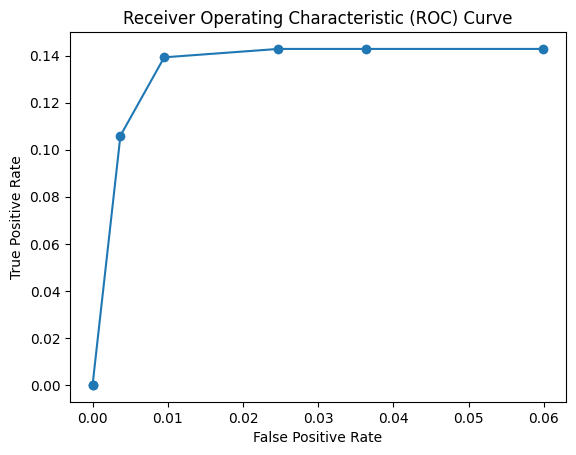

In [ ]:

total_positives = sum(mtp) + sum(mfn)
total_negatives = sum(mtn) + sum(mfp)

# Calculate TPR and FPR
TPR = [tp / total_positives for tp in mtp]
FPR = [fp / total_negatives for fp in mfp]

# Plotting the ROC curve
plt.plot(FPR, TPR, marker='o')


# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Displaying the plot
plt.show()

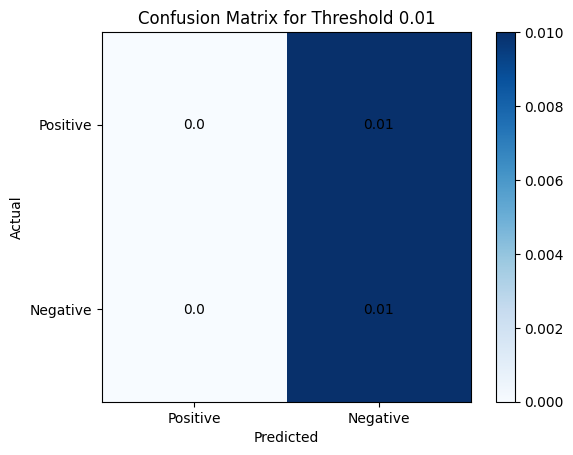

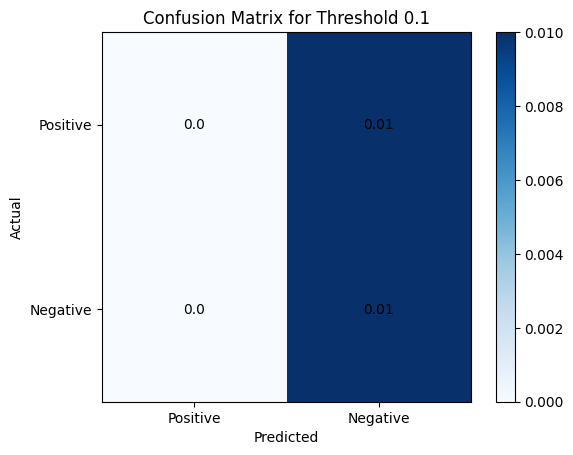

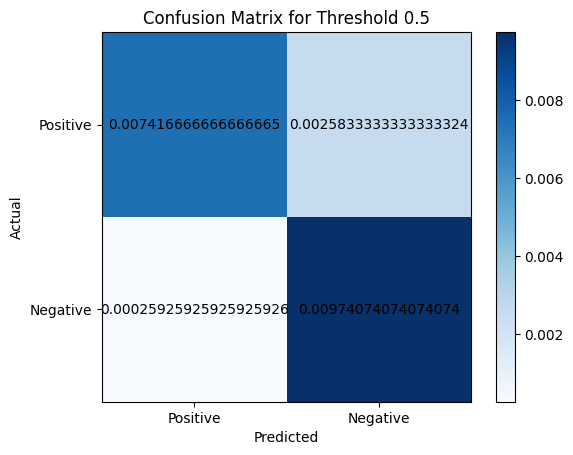

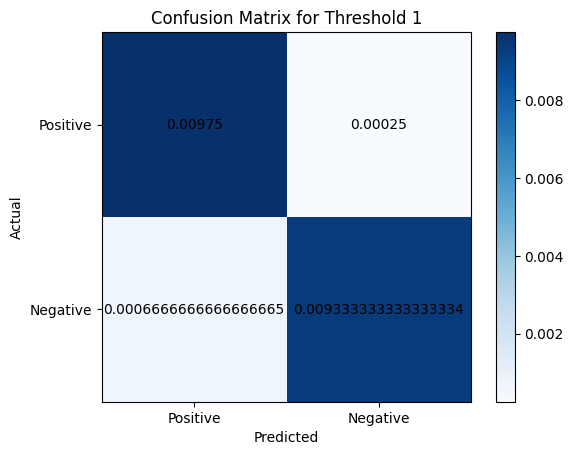

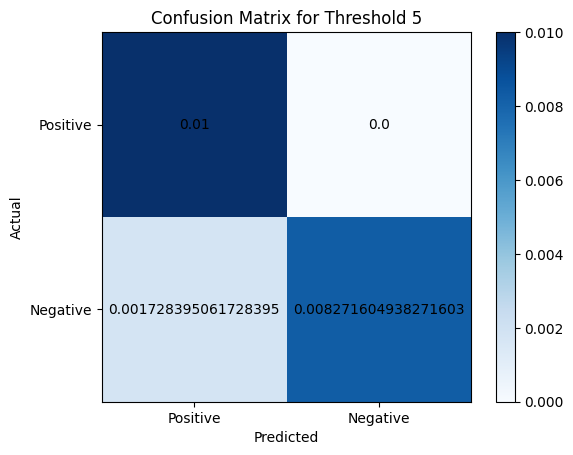

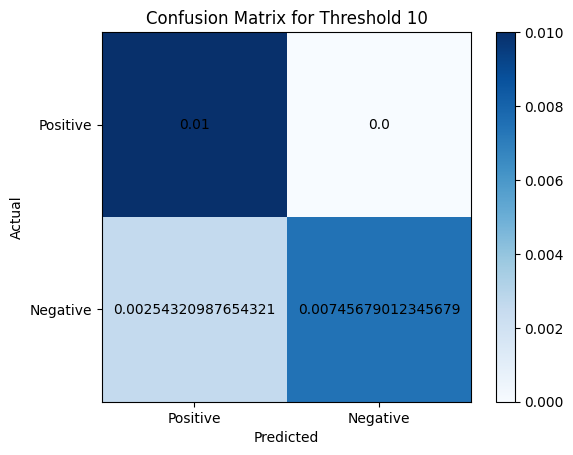

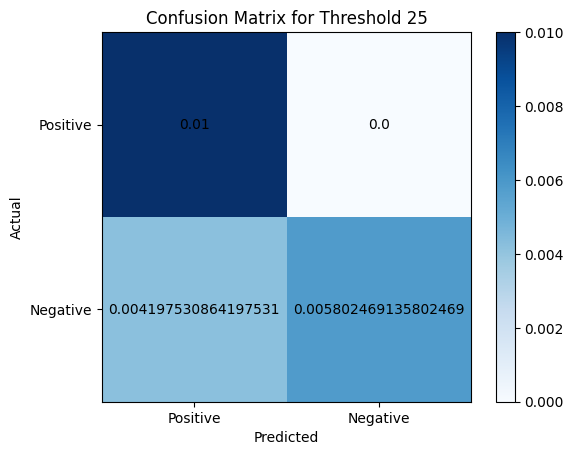

In [ ]:
# Sample percentages of TP, TN, FP, FN for different thresholds

import numpy as np
for i, threshold in enumerate(thresholds):

    total_positives = mtp[i] + mfn[i]
    total_negatives = mtn[i] + mfp[i]

    # Calculate TP, TN, FP, FN
    TP = mtp[i] / 100 * total_positives
    TN = mtn[i] / 100 * total_negatives
    FP = mfp[i] / 100 * total_negatives
    FN = mfn[i] / 100 * total_positives

    # Creating confusion matrix
    confusion_matrix = np.array([[TP, FN], [FP, TN]])

    # Plotting the confusion matrix
    plt.figure()
    plt.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()

    # Adding labels
    plt.title(f'Confusion Matrix for Threshold {threshold}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks([0, 1], ['Positive', 'Negative'])
    plt.yticks([0, 1], ['Positive', 'Negative'])

    # Displaying the plot
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center')

plt.show()


###Isolation Forest


In [7]:
with open('testdata6.json', 'r') as f:
  data = json.load(f)

example_dataset=data
exam1 = preprocess(example_dataset)
exam_fin, _=encode(exam1, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)

with open('attackdata.json', 'r') as f:
  data = json.load(f)
anomally_dataset=data
anom1 = preprocess(anomally_dataset)
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)


81
81
SIZE
81
21868
12
12
SIZE
12
21868


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

# Assuming prep_data is your dataset
# Splitting data into train and test sets
clf = IsolationForest(contamination=0.01, max_samples='auto', max_features = 1000 , n_estimators=1000, bootstrap=False)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.6666666666666666
false positive:  0.012345679012345678
true negative:  0.9876543209876543
false negative:  0.3333333333333333
for threshold:  0.1
true positive:  0.75
false positive:  0.012345679012345678
true negative:  0.9876543209876543
false negative:  0.25
for threshold:  0.5
true positive:  1.0
false positive:  0.09876543209876543
true negative:  0.9012345679012346
false negative:  0.0
for threshold:  1
true positive:  1.0
false positive:  0.1111111111111111
true negative:  0.8888888888888888
false negative:  0.0
for threshold:  5
true positive:  1.0
false positive:  0.1111111111111111
true negative:  0.8888888888888888
false negative:  0.0
for threshold:  10
true positive:  1.0
false positive:  0.18518518518518517
true negative:  0.8148148148148148
false negative:  0.0
for threshold:  25
true positive:  1.0
false positive:  0.345679012345679
true negative:  0.654320987654321
false negative:  0.0
in i= 1
for threshold:  0.01
true pos

###One class SVM

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)  # You can adjust the nu parameter as needed

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1

in i= 0
for threshold:  0.01
true positive:  1.0
false positive:  0.024691358024691357
true negative:  0.9753086419753086
false negative:  0.0
for threshold:  0.1
true positive:  1.0
false positive:  0.024691358024691357
true negative:  0.9753086419753086
false negative:  0.0
for threshold:  0.5
true positive:  1.0
false positive:  0.024691358024691357
true negative:  0.9753086419753086
false negative:  0.0
for threshold:  1
true positive:  1.0
false positive:  0.024691358024691357
true negative:  0.9753086419753086
false negative:  0.0
for threshold:  5
true positive:  1.0
false positive:  0.07407407407407407
true negative:  0.9259259259259259
false negative:  0.0
for threshold:  10
true positive:  1.0
false positive:  0.1728395061728395
true negative:  0.8271604938271605
false negative:  0.0
for threshold:  25
true positive:  1.0
false positive:  0.2839506172839506
true negative:  0.7160493827160493
false negative:  0.0
in i= 1
for threshold:  0.01
true positive:  1.0
false positive:

###SGD One Class SVM

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import train_test_split

# Assuming prep_data is your dataset
# Splitting data into train and test sets

# Create One-Class SVM model
clf = SGDOneClassSVM(nu=0.01, learning_rate='optimal', average=True)  # You can adjust the nu parameter as needed

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.5
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  1
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  5
true positive:  0.0
false positive:  0.06172839506172839
true negative:  0.9382716049382716
false negative:  1.0
for threshold:  10
true positive:  0.0
false positive:  0.14814814814814814
true negative:  0.8518518518518519
false negative:  1.0
for threshold:  25
true positive:  0.0
false positive:  0.43209876543209874
true negative:  0.5679012345679012
false negative:  1.0
in i= 1
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false positive:  0.0
true negative:  1.

###Autoencoder

In [12]:
import torch.nn as nn
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

class AE(nn.Module):
    def __init__(self, input_dim):
        super(AE, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(input_dim, 400),
            nn.Tanh(),
            nn.Linear(400, 200),
            nn.Tanh(),
            nn.Linear(200, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh(),
            nn.Linear(50, 25),
            nn.Tanh(),
            nn.Linear(25, 12),
        )
        self.dec = nn.Sequential(
            nn.Linear(12, 25),
            nn.Tanh(),
            nn.Linear(25, 50),
            nn.Tanh(),
            nn.Linear(50, 100),
            nn.Tanh(),
            nn.Linear(100, 200),
            nn.Tanh(),
            nn.Linear(200, 400),
            nn.Tanh(),
            nn.Linear(400, input_dim),
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode

lr = 6.0         # learning rate
w_d = 1e-4        # weight decay
epochs = 100

prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
input_dim = prep_data_tensor.shape[1]
model = AE(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=w_d)
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25)
  train_losses = []
  test_losses = []
  for epoch in range(epochs):
      # Forward pass and compute training loss
      model.train()
      sample = model(train_data)
      train_loss = criterion(train_data, sample)
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      # Compute testing loss
      model.eval()
      with torch.no_grad():
          test_outputs = model(test_data)
          test_loss = criterion(test_outputs, test_data)

      # Print progress and store losses
      if (epoch+1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
      train_losses.append(train_loss.item())
      test_losses.append(test_loss.item())

  def reconstruction_loss(input_data, output_data):
      return torch.mean((input_data - output_data)**2, axis=1)


  # Calculate reconstruction error for each data point in the test set
  def get_energy(data):
    with torch.no_grad():
        reconstructed_data = model(data)
        reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
    return reconstruction_errors

  # Get anomaly scores for test data
  test_energy=get_energy(train_data)
  train_energy=get_energy(test_data)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, 100-th)

    normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

    normal_indices = torch.where(normal_energy < threshold)[0]
    anomaly_indices = torch.where(normal_energy >= threshold)[0]
    attack = torch.tensor(get_energy(anom))
    example = torch.tensor(get_energy(exam))

    false_pos=len(torch.where(example >= threshold)[0])/len(example)
    true_pos=len(torch.where(attack >= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack < threshold)[0])/len(attack)
    true_neg=len(torch.where(example < threshold)[0])/len(example)

    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


Epoch [10/100], Train Loss: 0.0094, Test Loss: 0.0105
Epoch [20/100], Train Loss: 0.0091, Test Loss: 0.0102
Epoch [30/100], Train Loss: 0.0089, Test Loss: 0.0101
Epoch [40/100], Train Loss: 0.0088, Test Loss: 0.0100
Epoch [50/100], Train Loss: 0.0087, Test Loss: 0.0099
Epoch [60/100], Train Loss: 0.0087, Test Loss: 0.0098
Epoch [70/100], Train Loss: 0.0086, Test Loss: 0.0098
Epoch [80/100], Train Loss: 0.0086, Test Loss: 0.0097
Epoch [90/100], Train Loss: 0.0086, Test Loss: 0.0097
Epoch [100/100], Train Loss: 0.0085, Test Loss: 0.0097
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
true positive:  1.0
false positive:  0.012345679012345678
true negative:  0.9876543209876543
false negative:  0.0
true positive:  1.0
false positive:  0.09876543209876543
true negative:  0.9012345679012346
false negative:  0.0
true positive:  1.0
false positive:  0.1111111111111111
true negative:  0.8888888888888888
false negative:  0.0
true positive:  1.0
false positive:  0

###Recursive Autoencoder

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

class LSTMAutoencoder(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(LSTMAutoencoder, self).__init__()
    self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
    self.decoder = nn.LSTM(hidden_dim, input_dim, num_layers=1, batch_first=True)

  def forward(self, x):
    encoded, (h_n, c_n) = self.encoder(x)
    decoded, _ = self.decoder(encoded)
    return encoded, decoded


# Function to calculate reconstruction loss for each data point separately
def reconstruction_loss(input_data, output_data):
    return torch.mean((input_data - output_data[1])**2, axis=1)


# Prepare data (assuming prep_data is your dataset)
prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
input_dim = prep_data_tensor.shape[1]  # Input dimension
num_epochs = 50
learning_rate = 1e-2
model = LSTMAutoencoder(input_dim, 128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25)

  train_losses = []
  test_losses = []

  for epoch in range(num_epochs):
      # Forward pass and compute training loss
      model.train()
      outputs = model(train_data)[1]
      train_loss = criterion(outputs, train_data)

      # Backward pass and optimization
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      # Compute testing loss
      model.eval()
      with torch.no_grad():
          test_outputs = model(test_data)[1]
          test_loss = criterion(test_outputs, test_data)


  # Calculate reconstruction error for each data point in the test set
  def get_energy(data):
    with torch.no_grad():
        reconstructed_data = model(data)
        reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
    return reconstruction_errors

  # Get anomaly scores for test data
  test_energy=get_energy(train_data)
  train_energy=get_energy(test_data)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, 100-th)

    normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

    normal_indices = torch.where(normal_energy < threshold)[0]
    anomaly_indices = torch.where(normal_energy >= threshold)[0]
    attack = torch.tensor(get_energy(anom))
    example = torch.tensor(get_energy(exam))

    false_pos=len(torch.where(example >= threshold)[0])/len(example)
    true_pos=len(torch.where(attack >= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack < threshold)[0])/len(attack)
    true_neg=len(torch.where(example < threshold)[0])/len(example)

    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1




###Gaussian Mixture Model

In [ ]:
from sklearn import mixture


clf = mixture.GaussianMixture(n_components=1, covariance_type="full", tol=0.01)
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.score_samples(test_array)
  train_energy=clf.score_samples(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.score_samples(anom.numpy()))
    example = torch.tensor(clf.score_samples(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


###Local outlier factor

In [13]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=200, contamination=0.01, novelty=True)
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  1.0
false positive:  0.012345679012345678
true negative:  0.9876543209876543
false negative:  0.0
for threshold:  0.5
true positive:  1.0
false positive:  0.09876543209876543
true negative:  0.9012345679012346
false negative:  0.0
for threshold:  1
true positive:  1.0
false positive:  0.13580246913580246
true negative:  0.8641975308641975
false negative:  0.0
for threshold:  5
true positive:  1.0
false positive:  0.19753086419753085
true negative:  0.8024691358024691
false negative:  0.0
for threshold:  10
true positive:  1.0
false positive:  0.20987654320987653
true negative:  0.7901234567901234
false negative:  0.0
for threshold:  25
true positive:  1.0
false positive:  0.30864197530864196
true negative:  0.691358024691358
false negative:  0.0
in i= 1
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false n

### Bayesian gmm



In [ ]:
from sklearn import mixture



train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

clf = mixture.BayesianGaussianMixture(n_components=1, covariance_type="full")
clf.fit(train_data)


# Get anomaly scores for test data
train_energy=clf.score_samples(train_data)
test_energy=clf.score_samples(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 5)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.score_samples(anom.numpy()))
example = torch.tensor(clf.score_samples(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))

false_pos=len(torch.where(example <= threshold)[0])/len(example)
true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
false_neg=len(torch.where(attack > threshold)[0])/len(attack)
true_neg=len(torch.where(example > threshold)[0])/len(example)

print('true positive: ', true_pos)
print('false positive: ', false_pos)
print('true negative: ', true_neg)
print('false negative: ', false_neg)